<a href="https://colab.research.google.com/github/unajmieh/clickstream-Log-Analysis/blob/main/repository_1_task_1_click_stream_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
with open('e-shop clothing 2008 data description.txt', 'r', encoding='latin1') as file:
    data = file.readlines()
summary_lines = [line.strip() for line in data][:45]
summary_output = "\n".join(summary_lines)
from IPython.display import display, Markdown
display(Markdown(f"### E-Shop Clothing 2008 Data Description\n\n{summary_output}"))

### E-Shop Clothing 2008 Data Description

Data description e-shop clothing 2008

Variables:

1. YEAR (2008)

========================================================

2. MONTH -> from April (4) to August (8)

========================================================

3. DAY -> day number of the month

========================================================

4. ORDER -> sequence of clicks during one session

========================================================

5. COUNTRY -> variable indicating the country of origin of the IP address with the
following categories:

1-Australia
2-Austria
3-Belgium
4-British Virgin Islands
5-Cayman Islands
6-Christmas Island
7-Croatia
8-Cyprus
9-Czech Republic
10-Denmark
11-Estonia
12-unidentified
13-Faroe Islands
14-Finland
15-France
16-Germany
17-Greece
18-Hungary
19-Iceland
20-India
21-Ireland
22-Italy

In [4]:
import pandas as pd

def read_and_display_csv(file_path, delimiter=';', max_rows=20):
    """
    Read a CSV file and display the first few rows with customized settings.

    Parameters:
    - file_path (str): The path to the CSV file to be read.
    - delimiter (str): The delimiter used in the CSV file (default is ';').
    - max_rows (int): Maximum number of rows to display (default is 20).
    """
    df = pd.read_csv(file_path, sep=delimiter)
    # Set display options
    pd.set_option('display.max_rows', max_rows)  # Set the maximum number of rows to display
    pd.set_option('display.max_columns', None)  # Show all columns
    pd.set_option('display.width', 1000)  # Set width for better visual presentation
    pd.set_option('display.float_format', '{:.2f}'.format)  # Format floats
    print(df.head())

if __name__ == "__main__":
    file_name = 'e-shop clothing 2008.csv'  # Specify your CSV file name here
    read_and_display_csv(file_name)


   year  month  day  order  country  session ID  page 1 (main category) page 2 (clothing model)  colour  location  model photography  price  price 2  page
0  2008      4    1      1       29           1                       1                     A13       1         5                  1     28        2     1
1  2008      4    1      2       29           1                       1                     A16       1         6                  1     33        2     1
2  2008      4    1      3       29           1                       2                      B4      10         2                  1     52        1     1
3  2008      4    1      4       29           1                       2                     B17       6         6                  2     38        2     1
4  2008      4    1      5       29           1                       2                      B8       4         3                  2     52        1     1


## E-Shop Order Data Description  

The following details are associated with each order in the dataset:  

- **Year, Month, Day:** Date of the order.  
- **Order:** Unique identifier for each order.  
- **Country:** Country from where the order was placed.  
- **Session ID:** Identifier for the user's session.  
- **Page 1 (Main Category):** Main category of products viewed.  
- **Page 2 (Clothing Model):** Specific model of clothing viewed.  
- **Colour:** Color of the clothing model.  
- **Location:** Likely refers to geographic location or site location.  
- **Model Photography:** Probably the model under which the clothing was photographed.  
- **Price:** Prices associated with the items (unclear what differentiates the two price fields).  
- **Price 2:** A second price field associated with the items.  
- **Page:** Possibly refers to pagination in the e-commerce platform.

date
2008-04    48199
2008-05    35654
2008-06    32242
2008-07    35231
2008-08    14148
Freq: M, dtype: int64


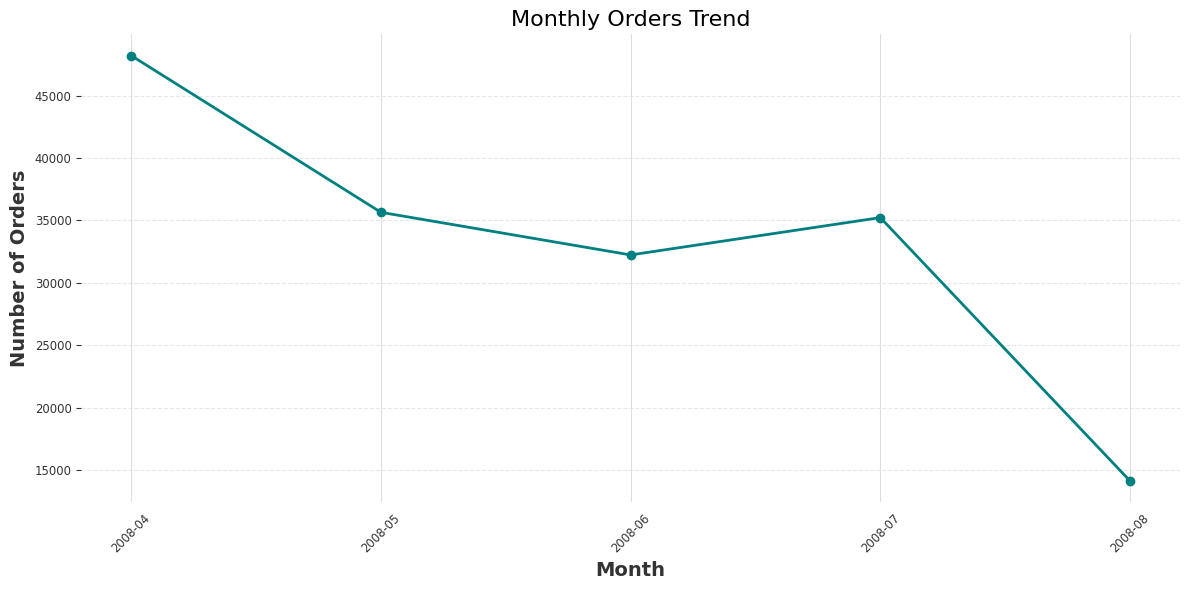

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_monthly_orders(file_path):
    df = pd.read_csv(file_path, sep=';')  # Adjust the separator if needed
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    monthly_orders = df.groupby(df['date'].dt.to_period("M")).size()
    print(monthly_orders)  # Print the monthly orders
    # Plotting the trend with a line plot
    plt.figure(figsize=(12, 6))  # Increase figure size
    plt.plot(monthly_orders.index.astype(str), monthly_orders, marker='o', linestyle='-', color='teal', linewidth=2, markersize=6)
    plt.title('Monthly Orders Trend', fontsize=16)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Number of Orders', fontsize=14)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Horizontal gridlines for better readability
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

if __name__ == "__main__":
    file_name = 'e-shop clothing 2008.csv'
    analyze_monthly_orders(file_name)


5. Moving Average/Exponential Smoothing
Smoothing Techniques:

- Apply moving averages or exponential smoothing techniques to understand the underlying trend better by reducing noise and emphasizing longer-term trends.

In [6]:
import pandas as pd

def process_clickstream_data(file_path, year_col='year', month_col='month', day_col='day', order_col='order'):
    """
    Load clickstream data, aggregate by date, and return a DataFrame with daily orders.
    """
    try:
        # Load the CSV file with proper delimiter
        df = pd.read_csv(file_path, sep=';')

        # Print column names for debugging
        print("Columns in the DataFrame:", df.columns.tolist())

        # Strip whitespace from column names
        df.columns = df.columns.str.strip()

        # Check if required columns exist
        missing_cols = [col for col in [year_col, month_col, day_col] if col not in df.columns]
        if missing_cols:
            raise KeyError(f"Missing columns in DataFrame: {missing_cols}")

        # Create a date column from year, month, and day
        df['date'] = pd.to_datetime(df[[year_col, month_col, day_col]])

        # Aggregate by date
        daily_data = df.groupby('date').agg({order_col: 'count'}).reset_index()
        daily_data.columns = ['date', 'daily_orders']

        return daily_data

    except FileNotFoundError as e:
        print("File not found:", e)
    except KeyError as e:
        print("KeyError:", e)
    except Exception as e:
        print("An unexpected error occurred:", e)

# Call the function and print results
daily_data = process_clickstream_data('./e-shop clothing 2008.csv')
if daily_data is not None:
    print(daily_data.head())

Columns in the DataFrame: ['year', 'month', 'day', 'order', 'country', 'session ID', 'page 1 (main category)', 'page 2 (clothing model)', 'colour', 'location', 'model photography', 'price', 'price 2', 'page']
        date  daily_orders
0 2008-04-01          3181
1 2008-04-02          3456
2 2008-04-03          1854
3 2008-04-04          1801
4 2008-04-05          1504


# Apply Moving Averages: 7-day moving average  

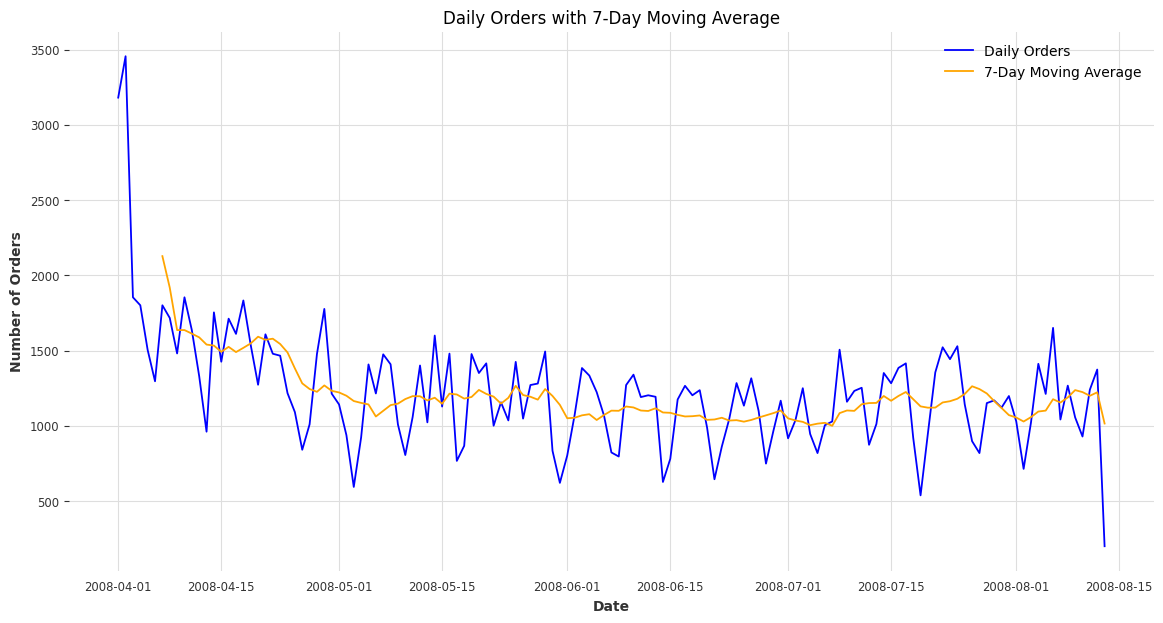

In [7]:
# Plotting for visualization
import matplotlib.pyplot as plt

# Calculate a 7-day moving average
daily_data['SMA_7'] = daily_data['daily_orders'].rolling(window=7).mean()
plt.figure(figsize=(14, 7))
plt.plot(daily_data['date'], daily_data['daily_orders'], label='Daily Orders', color='blue')
plt.plot(daily_data['date'], daily_data['SMA_7'], label='7-Day Moving Average', color='orange')
plt.title('Daily Orders with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()


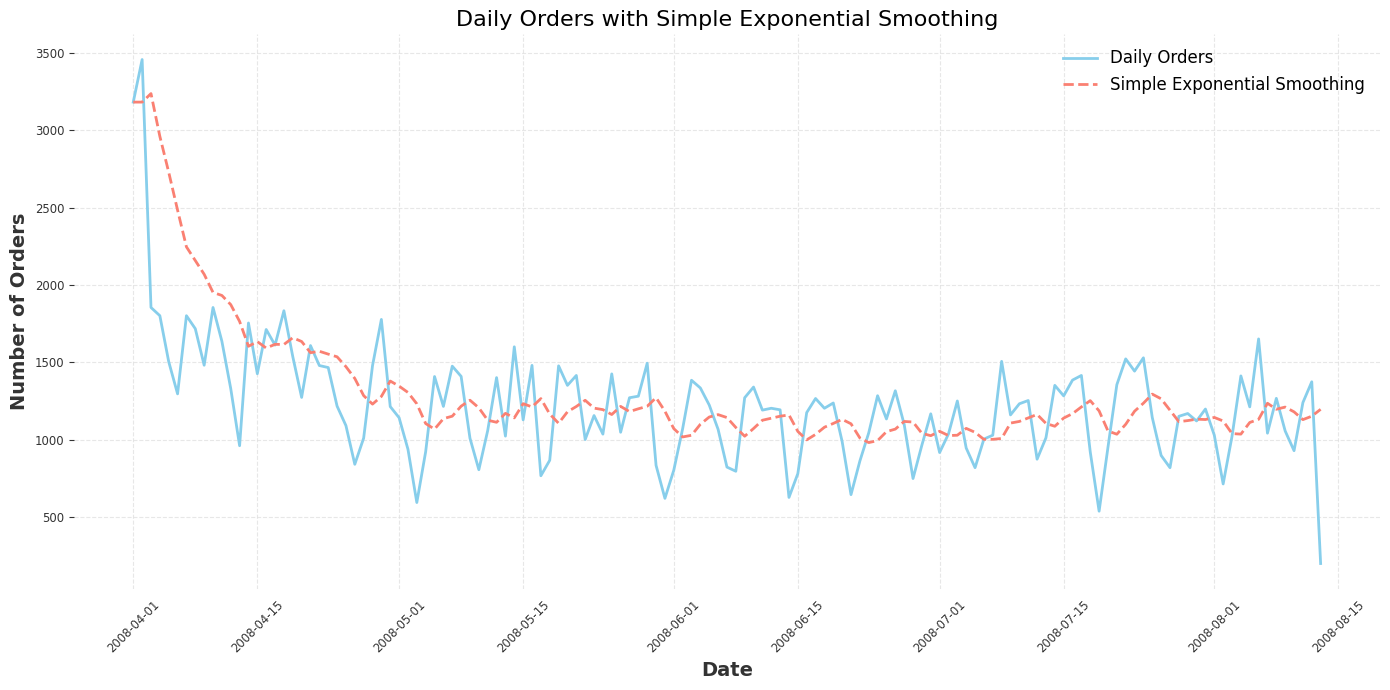

No data available for the date range: 2024-01-01 to 2024-01-15
No data available for the date range: 2024-01-16 to 2024-01-31


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np
from sklearn.linear_model import LinearRegression

def calculate_slope(data, start_date, end_date):
    """
    Calculate slope of the SES line for a specific date range.

    Parameters:
    - data: DataFrame containing daily orders with SES
    - start_date: str, start date in 'YYYY-MM-DD' format
    - end_date: str, end date in 'YYYY-MM-DD' format

    Returns:
    - slope: float, slope of the regression line for the specified date range
    """
    section = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

    # Check if the section is empty
    if section.empty:
        print(f"No data available for the date range: {start_date} to {end_date}")
        return None  # Or return 0 or some other value to indicate no slope can be calculated

    X = np.array(range(len(section))).reshape(-1, 1)  # X as time steps
    y = section['SES'].values

    model = LinearRegression()
    model.fit(X, y)
    return model.coef_[0]  # Return the slope

# Sample data: Assuming 'daily_data' is already created and contains the SES column.

# Apply Simple Exponential Smoothing
model = SimpleExpSmoothing(daily_data['daily_orders'])
model_fit = model.fit(smoothing_level=0.2, optimized=False)
daily_data['SES'] = model_fit.fittedvalues

# Plotting with improved format
plt.figure(figsize=(14, 7))
plt.plot(daily_data['date'], daily_data['daily_orders'], label='Daily Orders', color='skyblue', linewidth=2, linestyle='-')
plt.plot(daily_data['date'], daily_data['SES'], label='Simple Exponential Smoothing', color='salmon', linewidth=2, linestyle='--')
plt.title('Daily Orders with Simple Exponential Smoothing', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Analyze slopes in different sections
sections = [('2024-01-01', '2024-01-15'), ('2024-01-16', '2024-01-31')]  # Modify date ranges as needed
slopes = {}

for start, end in sections:
    slope = calculate_slope(daily_data, start, end)
    if slope is not None:  # Only add slope if it's valid
        slopes[f"{start} to {end}"] = slope

# Print slope results for each section
for period, slope in slopes.items():
    print(f"Slope from {period}: {slope}")

7. Feature Engineering for Predictive Modeling
If you plan to build a predictive model, consider creating additional features, such as:

- Lag features (previous values)
Rolling statistics (e.g., rolling mean or rolling standard deviation)
Time-based features (day of week, month, seasonality indicators)

# Feature Engineering

In [9]:
import pandas as pd

# Sample data creation (replace this with your actual data)
date_rng = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')
daily_orders = [100 + (i % 10) for i in range(len(date_rng))]  # Sample orders
daily_data = pd.DataFrame(date_rng, columns=['date'])
daily_data['daily_orders'] = daily_orders
daily_data.set_index('date', inplace=True)

# 1. Lag Features
for lag in range(1, 4):  # Create lag features for 1, 2, and 3 days
    daily_data[f'lag_{lag}'] = daily_data['daily_orders'].shift(lag)

# 2. Rolling Statistics
window_size = 7  # Example: 7-day rolling window
daily_data['rolling_mean'] = daily_data['daily_orders'].rolling(window=window_size).mean()
daily_data['rolling_std'] = daily_data['daily_orders'].rolling(window=window_size).std()

# 3. Time-Based Features
daily_data['day_of_week'] = daily_data.index.dayofweek  # Monday=0, Sunday=6
daily_data['month'] = daily_data.index.month
daily_data['day'] = daily_data.index.day
daily_data['is_weekend'] = daily_data['day_of_week'].isin([5, 6]).astype(int)  # 1 if weekend, 0 if not

# Display the updated DataFrame
print(daily_data.head(10))

            daily_orders  lag_1  lag_2  lag_3  rolling_mean  rolling_std  day_of_week  month  day  is_weekend
date                                                                                                         
2024-01-01           100    NaN    NaN    NaN           NaN          NaN            0      1    1           0
2024-01-02           101 100.00    NaN    NaN           NaN          NaN            1      1    2           0
2024-01-03           102 101.00 100.00    NaN           NaN          NaN            2      1    3           0
2024-01-04           103 102.00 101.00 100.00           NaN          NaN            3      1    4           0
2024-01-05           104 103.00 102.00 101.00           NaN          NaN            4      1    5           0
2024-01-06           105 104.00 103.00 102.00           NaN          NaN            5      1    6           1
2024-01-07           106 105.00 104.00 103.00        103.00         2.16            6      1    7           1
2024-01-08

### Interpreting the DataFrame: Time Series Analysis

The DataFrame provides a structured view of your time series data with features that enable deeper analysis and modeling. Below is a detailed explanation of each column and its significance:

---

### **DataFrame Columns and Their Interpretations**

| **Column**         | **Description**                                                                                           | **Example**                                                                                     |
|---------------------|-----------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **daily_orders**    | The central metric showing the number of orders for each day.                                             | On **2024-01-01**, there were **100** orders, and on **2024-01-10**, there were **109** orders. |
| **lag_1, lag_2, lag_3** | Previous day's orders (1, 2, or 3 days ago), useful for identifying short-term dependencies.            | On **2024-01-02**, `lag_1` is **100** (orders on 2024-01-01), while `lag_2` and `lag_3` are NaN. |
| **rolling_mean**    | The average number of orders over a rolling window (e.g., last 7 days).                                   | On **2024-01-07**, the rolling mean is **103.00**, indicating an average of 103 orders/day from 2024-01-01 to 2024-01-07. |
| **rolling_std**     | The standard deviation of orders over the same rolling window, reflecting variability in demand.           | On **2024-01-07**, a standard deviation of **2.16** shows low variability around the rolling mean of 103. |
| **day_of_week**     | The day of the week (0 = Monday, 6 = Sunday), useful for identifying weekday vs weekend trends.            | On **2024-01-01**, the value is `0` (Monday), and on **2024-01-06**, it is `5` (Saturday).       |
| **month**           | The month of the year, useful for identifying seasonal patterns or monthly trends.                        | All rows in this example are from January (`1`).                                                |
| **day**             | The day of the month, which can help in filtering or sorting data within a specific month.                | For instance, the value for January 10th is `10`.                                               |
| **is_weekend**      | A binary indicator showing whether a day is a weekend (`1` for Saturday/Sunday, `0` otherwise).            | On **2024-01-06**, the value is `1` (Saturday), while on **2024-01-05**, it is `0` (Friday).     |

---

### **Key Insights**

#### 1. **Daily Orders**
   - This column represents the primary metric for analysis.
   - Example: From January 1st to January 10th, `daily_orders` increased from 100 to 109, showing an upward trend.

#### 2. **Lag Features**
   - Lagged values provide historical context for modeling trends or seasonality.
   - Example: If `daily_orders` tends to increase following high values in `lag_1`, this may indicate momentum or short-term dependencies.

#### 3. **Rolling Mean and Standard Deviation**
   - These features smooth out daily fluctuations and highlight broader trends or variability.
   - Example: A rolling mean of 103 on January 7th suggests stable demand over the previous week, while a low rolling standard deviation (e.g., 2.16) indicates consistent order levels.

#### 4. **Day of Week and Weekend Effects**
   - Analyzing `day_of_week` and `is_weekend` can reveal behavioral patterns.
   - Example: If weekends consistently show higher `daily_orders`, this could indicate different customer behavior compared to weekdays.

#### 5. **Seasonality**
   - Columns like `month` and `day` help identify periodic trends.
   - Example: If demand peaks in December or drops in January, these columns can help quantify seasonal effects.

---

### **How to Use This DataFrame**

This structured DataFrame serves as an excellent foundation for various analyses:

#### *Trend Analysis*
   - Use `daily_orders`, `rolling_mean`, and `rolling_std` to identify long-term growth or fluctuations.

#### *Seasonal Patterns*
   - Analyze how order volumes vary by `month`, `day_of_week`, or `is_weekend`.

#### *Predictive Modeling*
   - Incorporate lag features (`lag_1`, etc.) into time series forecasting models like ARIMA or machine learning models.

#### *Behavioral Insights*
   - Compare weekdays vs weekends using `is_weekend`.
   - Study variability in demand using rolling statistics.

By combining these features with visualization techniques or predictive models, you can uncover valuable insights into your time series data and make data-driven decisions effectively!

In [10]:
%%capture
!pip install pytorch_forecasting

In [11]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
date_range = pd.date_range(start="2024-01-01", periods=30, freq="D")
df = pd.DataFrame({
    "date": date_range,
    "daily_orders": np.random.randint(50, 150, size=len(date_range)),
    "country": ["Country_A"] * len(date_range),
    "day_of_week": date_range.dayofweek,
    "is_weekend": (date_range.dayofweek >= 5).astype(int),
    "rolling_mean": np.nan,
    "rolling_std": np.nan,
})

# Calculate rolling statistics
df["rolling_mean"] = df["daily_orders"].rolling(window=7, min_periods=1).mean()
df["rolling_std"] = df["daily_orders"].rolling(window=7, min_periods=1).std()

print(df.head())

        date  daily_orders    country  day_of_week  is_weekend  rolling_mean  rolling_std
0 2024-01-01           138  Country_A            0           0        138.00          NaN
1 2024-01-02           104  Country_A            1           0        121.00        24.04
2 2024-01-03           138  Country_A            2           0        126.67        19.63
3 2024-01-04            96  Country_A            3           0        119.00        22.18
4 2024-01-05           137  Country_A            4           0        122.60        20.83


In [12]:

# Ensure time_idx is sequential within each group
df["time_idx"] = df.groupby("country")["date"].rank().astype(int) - 1
df["day_of_week"] = df["day_of_week"].astype("category")

# Example DataFrame
date_range = pd.date_range(start="2024-01-01", periods=30, freq="D")
df = pd.DataFrame({
    "date": date_range,
    "daily_orders": np.random.randint(50, 150, size=len(date_range)),
    "country": ["Country_A"] * len(date_range),
    "day_of_week": date_range.dayofweek,
    "is_weekend": (date_range.dayofweek >= 5).astype(int),
})

# Convert 'date' to integer time index and drop it
df["time_idx"] = (df["date"] - df["date"].min()).dt.days
df = df.drop(columns=["date"])

In [13]:
# Convert 'country' and 'day_of_week' to strings
df["country"] = df["country"].astype(str)
df["day_of_week"] = df["day_of_week"].astype(str)
# Convert 'is_weekend' to string type
df["is_weekend"] = df["is_weekend"].astype(str)

In [14]:
# Check updated data types
print(df.dtypes)

daily_orders     int64
country         object
day_of_week     object
is_weekend      object
time_idx         int64
dtype: object


In [15]:
# Ensure 'daily_orders' is numeric (float or int)
df['daily_orders'] = df['daily_orders'].astype(float)

In [16]:
from pytorch_forecasting import TimeSeriesDataSet

# Define the dataset
training = TimeSeriesDataSet(
    df,
    time_idx="time_idx",  # Use the integer-based time index
    target="daily_orders",  # Target variable to predict
    group_ids=["country"],  # Grouping variable (e.g., country)
    min_encoder_length=12,  # Minimum historical steps for prediction
    max_encoder_length=24,  # Maximum historical steps for prediction
    min_prediction_length=6,  # Minimum future steps to predict
    max_prediction_length=12,  # Maximum future steps to predict
    static_categoricals=["country"],  # Static categorical variables (must be strings)
    time_varying_known_categoricals=["day_of_week", "is_weekend"],  # Known time-varying categoricals (must be strings)
    time_varying_unknown_reals=["daily_orders"],  # Unknown time-varying real-valued variables
)


In [17]:
# Create data loaders
train_dataloader = training.to_dataloader(train=True, batch_size=64, num_workers=4)
val_dataloader = training.to_dataloader(train=False, batch_size=64, num_workers=4)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [18]:
%%capture
!pip install pytorch_forecasting
!pip install pytorch-forecasting pytorch-lightning torch --upgrade

In [19]:
import pytorch_forecasting
import pytorch_lightning as pl
import torch

print("PyTorch Forecasting:", pytorch_forecasting.__version__)
print("PyTorch Lightning:", pl.__version__)
print("PyTorch:", torch.__version__)

PyTorch Forecasting: 1.2.0
PyTorch Lightning: 2.5.0.post0
PyTorch: 2.5.1+cu121


"""
Example: Temporal Fusion Transformer (TFT)
If we focus on the Temporal Fusion Transformer (TFT), it can handle multiple time series inputs, incorporates both historical and static covariates, and achieves excellent forecasting capabilities. Below is a brief overview of how you might set up a TFT for your data:
"""

In [20]:
%%capture
from lightning.pytorch import Trainer
from pytorch_forecasting import TemporalFusionTransformer

# Define the Temporal Fusion Transformer model
model = TemporalFusionTransformer.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=16,  # Number of hidden units in LSTM layers
    attention_head_size=4,  # Number of attention heads
    dropout=0.1,
    hidden_continuous_size=8,  # Hidden size for continuous variables
)

# Create data loaders
train_dataloader = training.to_dataloader(train=True, batch_size=64, num_workers=4)
val_dataloader = training.to_dataloader(train=False, batch_size=64, num_workers=4)

# Train the model using PyTorch Lightning Trainer on CPU
trainer = Trainer(max_epochs=30, accelerator="cpu")  # Use CPU for training
trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
   | Name                               | Type                            | Params | Mode 
------------------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0      | train
1  | logging_metrics                    | ModuleList                      | 0      | train
2  | input_embeddings                   | MultiEmbedding                  | 38     | train
3  | prescalers                         | ModuleDict                      | 32     | train
4  | static_variable_selection          | VariableSelectionNetwork      

In [21]:
# Evaluate the model on the validation data
validation_metrics = trainer.validate(model, dataloaders=val_dataloader)
print("Validation Metrics:", validation_metrics)

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │    24.042428970336914     │
│         val_MAPE          │       1289284224.0        │
│         val_RMSE          │     38.06439208984375     │
│         val_SMAPE         │    0.4104941487312317     │
│         val_loss          │     6.081942081451416     │
└───────────────────────────┴───────────────────────────┘

Validation Metrics: [{'val_loss': 6.081942081451416, 'val_SMAPE': 0.4104941487312317, 'val_MAE': 24.042428970336914, 'val_RMSE': 38.06439208984375, 'val_MAPE': 1289284224.0}]


In [22]:
# Make predictions on the validation dataset
predictions = model.predict(val_dataloader)
print("Predictions:", predictions)

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predictions: tensor([[119.2593,  67.9219,  77.4888, 104.4942,  84.7223, 112.2365,  48.8450,
         119.6507,  69.3539,  77.3496, 104.8204,  84.6740],
        [121.1193,  67.8088,  77.4563, 104.8769,  84.9189, 113.8047,  48.1553,
         121.3842,  69.2328,  77.3574, 105.4067,  84.9146],
        [119.0350,  65.7724,  75.2329, 102.1163,  82.6743, 111.5155,  46.1457,
         119.3677,  67.1606,  75.1766, 102.8407,  82.7137],
        [121.0042,  67.3496,  76.6281, 103.0722,  84.1458, 113.0629,  47.4942,
         121.6293,  68.7281,  76.6203, 104.0153,  84.2361],
        [122.1551,  67.8855,  77.9394, 101.3979,  85.5115, 113.6362,  47.6424,
         123.4473,  69.2627,  77.7614, 101.5779,  85.4347],
        [124.7402,  70.0642,  80.0598, 103.5118,  87.6879, 116.1011,  49.6625,
         126.1336,  71.4291,  79.9203, 103.7844,  87.6528],
        [126.8026,  72.0446,  82.1950, 105.9579,  89.9140, 117.4186,  51.3331,
         128.2727,  73.4102,  82.0153, 106.1491,  89.8467],
        [ 90.8

# split the data

In [ ]:
"""
2. DeepAR
DeepAR is an autoregressive recurrent neural network model that forecasts future values given historic values. It's particularly useful for probabilistic forecasting and can be scaled across multiple time series for better performance.
"""

In [23]:
%%capture
from pytorch_forecasting import DeepAR
from lightning.pytorch import Trainer

# Define the DeepAR model from the dataset
model = DeepAR.from_dataset(
    training,
    learning_rate=0.03,
    hidden_size=30,  # Number of hidden units in RNN layers
    rnn_layers=2,  # Number of RNN layers
    dropout=0.1,  # Dropout rate for regularization
)

# Train the model using PyTorch Lightning Trainer on CPU
trainer = Trainer(
    max_epochs=30,
    accelerator="cpu",  # Use CPU for training; change to 'gpu' if GPU is available.
)
trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: 
  | Name                   | Type                   | Params | Mode 
--------------------------------------------------------------------------
0 | loss                   | NormalDistributionLoss | 0      | train
1 | logging_metrics        | ModuleList             | 0      | train
2 | embeddings             | MultiEmbedding         | 38     | train
3 | rnn                    | LSTM                   | 12.4 K | train
4 | distribution_projector | Linear                 | 62     | train
--------------------------------------------------------------------------
12.5 K    Trainable params
0         Non-trainable params
12

In [24]:
# Evaluate on validation data and print metrics like loss
validation_metrics = trainer.validate(model=model, dataloaders=val_dataloader)
print("Validation Metrics:", validation_metrics)

# Make predictions on validation data
predictions = model.predict(val_dataloader)

# Print predictions (as NumPy array)
print("Predictions:", predictions[:10])  # First 10 predictions

# If you want raw predictions with uncertainty intervals:
raw_predictions = model.predict(val_dataloader, mode="raw")

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_MAE          │    15.583919525146484     │
│         val_MAPE          │       1305522944.0        │
│         val_MASE          │    0.43713387846946716    │
│         val_RMSE          │     35.10452651977539     │
│         val_SMAPE         │    0.31220346689224243    │
│         val_loss          │     2.917661666870117     │
└───────────────────────────┴───────────────────────────┘

INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Validation Metrics: [{'val_loss': 2.917661666870117, 'val_SMAPE': 0.31220346689224243, 'val_MAE': 15.583919525146484, 'val_RMSE': 35.10452651977539, 'val_MAPE': 1305522944.0, 'val_MASE': 0.43713387846946716}]


INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predictions: tensor([[111.8767,  61.3296,  85.7094, 109.1510,  62.9880, 110.1319,  50.7671,
         125.8397,  71.2527,  61.9636,  93.4745,  93.0225],
        [113.0030,  61.6699,  86.2815, 108.7131,  62.5936, 109.3768,  49.8369,
         128.1113,  71.4801,  60.8613,  94.4912,  91.8902],
        [110.5548,  59.1928,  85.1543, 105.0375,  60.7968, 107.1434,  48.1269,
         125.5874,  69.3539,  60.4255,  91.9466,  86.9705],
        [112.8848,  59.7906,  84.6170, 109.5063,  62.1894, 110.1573,  49.1986,
         127.1489,  70.9213,  62.0799,  93.7850,  89.5911],
        [113.8708,  61.5420,  86.4889, 110.0253,  62.6587, 112.3780,  49.4841,
         129.5798,  71.8159,  61.8739,  94.6274,  93.3956],
        [116.0785,  63.5719,  88.3070, 111.3003,  65.9097, 112.0643,  51.1190,
         133.1224,  73.7953,  65.2994,  93.9858,  97.1797],
        [118.5040,  64.9937,  87.7620, 111.2422,  67.7322, 114.0061,  53.1248,
         133.6484,  75.1302,  65.8531,  96.7031,  98.3790],
        [ 71.9

In [ ]:
"""
3. N-BEATS (Neural Basis Expansion Analysis)
N-BEATS is a deep learning architecture specifically designed for univariate time series forecasting. It employs a stack of fully connected feedforward neural networks and achieves strong results with relatively simple architecture setup.
"""

In [25]:
print(df.isnull().sum())

daily_orders    0
country         0
day_of_week     0
is_weekend      0
time_idx        0
dtype: int64


In [26]:
import pandas as pd

# Check the number of entries for each group
group_counts = df.groupby('country').size()
print("Entries per group:\n", group_counts)

# Check the maximum index for your time index
max_time_idx = df['time_idx'].max()
print("Max time index:", max_time_idx)

# You need at least `max_encoder_length + max_prediction_length` entries for each country
required_entries_per_group = 24 + 12  # Encoder length + prediction length
print(f"Required entries per group: {required_entries_per_group}")
print("Groups with insufficient entries:")
print(group_counts[group_counts < required_entries_per_group])

Entries per group:
 country
Country_A    30
dtype: int64
Max time index: 29
Required entries per group: 36
Groups with insufficient entries:
country
Country_A    30
dtype: int64


In [27]:
print(df.columns)
print(df.head())

Index(['daily_orders', 'country', 'day_of_week', 'is_weekend', 'time_idx'], dtype='object')
   daily_orders    country day_of_week is_weekend  time_idx
0         81.00  Country_A           0          0         0
1        123.00  Country_A           1          0         1
2         60.00  Country_A           2          0         2
3         71.00  Country_A           3          0         3
4         60.00  Country_A           4          0         4


In [28]:
print(df.columns.tolist())
print(df.dtypes)
print(df.isnull().sum())
print(df.duplicated().sum())

['daily_orders', 'country', 'day_of_week', 'is_weekend', 'time_idx']
daily_orders    float64
country          object
day_of_week      object
is_weekend       object
time_idx          int64
dtype: object
daily_orders    0
country         0
day_of_week     0
is_weekend      0
time_idx        0
dtype: int64
0


In [54]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Assuming 'df' is your DataFrame containing the time series data
# Ensure 'time_idx', 'daily_orders', and 'country' columns exist
synthetic_data = []

# Loop through each group (e.g., by 'country') if applicable
for country, group in df.groupby('country'):
    # Fit an Exponential Smoothing model
    model = ExponentialSmoothing(
        group['daily_orders'],
        trend='add',  # Additive trend
        seasonal='add',  # Additive seasonality
        seasonal_periods=12  # Assuming monthly seasonality; adjust as needed
    )
    fitted_model = model.fit()

    # Generate future forecasts (e.g., next 24 points)
    forecast_steps = 24  # Increased number of synthetic points to generate
    forecast = fitted_model.forecast(steps=forecast_steps)

    # Create a DataFrame for the synthetic data
    synthetic_df = pd.DataFrame({
        'time_idx': range(group['time_idx'].max() + 1, group['time_idx'].max() + 1 + len(forecast)),
        'daily_orders': forecast,
        'country': country  # Retain the group identifier
    })

    synthetic_data.append(synthetic_df)

# Combine all synthetic data into a single DataFrame
synthetic_data = pd.concat(synthetic_data, ignore_index=True)

# Append synthetic data to the original dataset
augmented_df = pd.concat([df, synthetic_data], ignore_index=True)

# Sort by time_idx and reset index for continuity
augmented_df = augmented_df.sort_values(by=['country', 'time_idx']).reset_index(drop=True)

#print(augmented_df.head())
print(f"Total entries in training dataset: {len(augmented_df)}")
print(augmented_df)

Total entries in training dataset: 54
    daily_orders    country day_of_week is_weekend  time_idx
0          81.00  Country_A           0          0         0
1         123.00  Country_A           1          0         1
2          60.00  Country_A           2          0         2
3          71.00  Country_A           3          0         3
4          60.00  Country_A           4          0         4
..           ...        ...         ...        ...       ...
49        125.33  Country_A         NaN        NaN        49
50         62.67  Country_A         NaN        NaN        50
51         89.00  Country_A         NaN        NaN        51
52         72.01  Country_A         NaN        NaN        52
53         73.03  Country_A         NaN        NaN        53

[54 rows x 5 columns]


In [51]:
from pytorch_forecasting import TimeSeriesDataSet

training_1 = TimeSeriesDataSet(
    augmented_df,
    time_idx="time_idx",
    target="daily_orders",
    group_ids=["country"],
    min_encoder_length=12,
    max_encoder_length=12,
    min_prediction_length=6,
    max_prediction_length=6,
    static_categoricals=["country"],
    time_varying_known_categoricals=["day_of_week", "is_weekend"],
    time_varying_unknown_reals=["daily_orders"],
)
# After this, check the number of entries in the dataset
print(f"Total entries in training dataset: {len(training_1)}")

TypeError: '<' not supported between instances of 'float' and 'str'

In [30]:
%%capture
from pytorch_forecasting import NBeats
from lightning.pytorch import Trainer

# Define the N-BEATS model from the dataset
model = NBeats.from_dataset(
    training,
    learning_rate=3e-2,
    weight_decay=1e-2,
    widths=[32, 512],  # Widths of the blocks
    backcast_loss_ratio=0.1,  # Loss ratio for backcast vs forecast
)

# Train the model using PyTorch Lightning Trainer on CPU or GPU
trainer = Trainer(
    max_epochs=30,
    accelerator="cpu",  # Change to "gpu" if you want to use GPU
)
trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=val_dataloader)


AssertionError: The only variable as input should be the target which is part of time_varying_unknown_reals

In [ ]:
# Evaluate on validation data and print metrics like loss
validation_metrics = trainer.validate(model=model, dataloaders=val_dataloader)
print("Validation Metrics:", validation_metrics)

In [ ]:
# Make predictions on validation data
predictions = model.predict(val_dataloader)

# Print predictions (as NumPy array)
print("Predictions:", predictions[:10])  # First 10 predictions

"""
5. Temporal Convolutional Networks (TCN)
TCNs are an alternative to recurrent architectures, using convolutional layers for sequence modeling. They retain long-term dependencies while offering faster training times than RNNs.

"""

In [33]:
%%capture
!pip uninstall u8darts  # Uninstall any potential faulty installs
!pip install u8darts    # Install Darts

In [38]:
print(f"Total entries in original dataset: {len(df)}")

Total entries in original dataset: 30


In [40]:
import pandas as pd
from pytorch_forecasting import TimeSeriesDataSet
from darts import TimeSeries
from darts.models import TCNModel
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame containing the time series data
# Create the TimeSeriesDataSet
training = TimeSeriesDataSet(
    df,
    time_idx="time_idx",
    target="daily_orders",
    group_ids=["country"],
    min_encoder_length=12,
    max_encoder_length=12,
    min_prediction_length=6,
    max_prediction_length=6,
    static_categoricals=["country"],
    time_varying_known_categoricals=["day_of_week", "is_weekend"],
    time_varying_unknown_reals=["daily_orders"],
)

# Check the number of entries in the dataset
print(f"Total entries in training dataset: {len(training)}")

# Split the data into training and validation sets
train_df, val_df = train_test_split(df, test_size=0.2, shuffle=False)

# Convert DataFrames to Darts TimeSeries
train_series = TimeSeries.from_dataframe(train_df, time_col='time_idx', value_cols='daily_orders', fill_missing_dates=True)
val_series = TimeSeries.from_dataframe(val_df, time_col='time_idx', value_cols='daily_orders', fill_missing_dates=True)

# Create the TCN model with the specified parameters
# Adjust chunk lengths
input_chunk_length = 6
output_chunk_length = 3
kernel_size = 5

model = TCNModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=output_chunk_length,
    n_epochs=20,
    dropout=0,
    dilation_base=2,
    weight_norm=True,
    kernel_size=kernel_size,
    num_filters=4,
    random_state=0
)

# Ensure training and validation sets meet new length requirements
train_series = TimeSeries.from_dataframe(train_df, time_col='time_idx', value_cols='daily_orders', fill_missing_dates=True)
val_series = TimeSeries.from_dataframe(val_df, time_col='time_idx', value_cols='daily_orders', fill_missing_dates=True)

model.fit(train_series, val_series=val_series)


ERROR:darts.models.forecasting.torch_forecasting_model:ValueError: The provided validation time series dataset is too short for obtaining even one training point.


Total entries in training dataset: 13


ValueError: The provided validation time series dataset is too short for obtaining even one training point.

"""
6. AutoML Solutions
Consider utilizing AutoML platforms like H2O.ai or Google Cloud AutoML. These platforms automate the model selection and hyperparameter tuning processes, providing you with state-of-the-art models without needing to delve deeply into each one.
"""

In [ ]:
%%capture
!pip install h2o
!pip install google-cloud-aiplatform

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=eb672b8d345aa18f967520d334d5ecdae07942d75a99ac82684296c23b8827f9
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Initialize H2O
h2o.init()

# Example data (replace this with your actual dataset)
df = pd.DataFrame({
    "date": pd.date_range(start="2024-01-01", periods=100, freq="D"),
    "value": [i + (i % 7) * 10 for i in range(100)],  # Target variable
})
df["time_idx"] = range(len(df))  # Time index

# Convert to H2O Frame
h2o_df = h2o.H2OFrame(df)

# Specify target and predictors
target = "value"
predictors = ["time_idx"]

In [ ]:
# Split data into training and testing sets
train, test = h2o_df.split_frame(ratios=[0.8])

# Run AutoML for time series forecasting
aml = H2OAutoML(max_models=10, seed=1)
aml.train(x=predictors, y=target, training_frame=train)

# View leaderboard of models
lb = aml.leaderboard
print(lb)

In [ ]:
# Get predictions on test set
predictions = aml.leader.predict(test)
print(predictions)

# Evaluate performance on test data
performance = aml.leader.model_performance(test)
print(performance)

store in the cloud

In [ ]:
from google.cloud import storage

# Upload CSV file to Google Cloud Storage (replace bucket_name with your bucket)
client = storage.Client()
bucket = client.bucket("your-bucket-name")
blob = bucket.blob("time_series_data.csv")
blob.upload_from_filename("time_series_data.csv")

In [ ]:
from google.cloud import aiplatform

# Initialize Vertex AI client
aiplatform.init(project="your-project-id", location="us-central1")

# Create dataset from GCS file
dataset = aiplatform.TabularDataset.create(
    display_name="Time Series Dataset",
    gcs_source=["gs://your-bucket-name/time_series_data.csv"],
)
print(dataset.resource_name)

In [ ]:
model = aiplatform.AutoMLTabularTrainingJob(
    display_name="time_series_model",
    optimization_prediction_type="regression",
)

# Train the model (replace target_column with your target variable name)
model_resource = model.run(
    dataset=dataset,
    target_column="value",
    input_data_config={"data_split": {"training_fraction": 0.8}},
    model_display_name="time_series_model",
)

In [ ]:
endpoint = model_resource.deploy(machine_type="n1-standard-4")

# Predict on new data (as a pandas DataFrame)
instances = [{"time_idx": i} for i in range(101, 110)]
predictions = endpoint.predict(instances=instances)
print(predictions)